In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

db_filename='dinofunworld.db'
conn= sqlite3.connect(db_filename)
c= conn.cursor()

In [24]:
c.execute("SELECT visitorID, sequence FROM sequences WHERE visitorID IN (165316, 1835254, 296394, 404385, 448990)")
m=c.fetchall()
#print(m[0])

seq=[]

for x in range(len(m)):
    location= m[x][1].split('-')
    seq.append(location) 
#print(len(seq[3]))

distMatrix={}

for y in range(len(m)):
    distMatrix[m[y][0]]={}
    for z in range(len(m)):
        num=0
        if m[y][0] != m[z][0]:
            for n in range(len(seq[0])):
                if seq[y][n] != seq[z][n]:
                    num = num +1
            distMatrix[m[y][0]][m[z][0]]= num
    
print(distMatrix)

#165316, 1835254, 296394, 404385, and 448990

{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


In [21]:
c.execute("SELECT name, AttractionID FROM attraction WHERE Category IN('Thrill Rides\r','Kiddie Rides\r', 'Rides for Everyone\r')")
m=c.fetchall()
#print(m) #Thrill Rides\r, Kiddie Rides\r Rides for Everyone\r

myList=[]
attendanceDict={}
myDict2={}

for x in range(len(m)):              #runs for each applicable attraction 
    c.execute("SELECT sequence FROM sequences WHERE sequence LIKE '%-" + str(m[x][1]) + "-%'")
    n=c.fetchall()
    #gets all records where AttractionID is present in sequence (table that shows all AttractionIDs visited)
    n1=len(n[0][0].split('-')) #576

    for y in range(len(n)):   #iterates through each element of the sequence
        val=n[y][0].split('-')  #gets a sequence and splits it into a list
        for z in range(n1):
            if val[z]==str(m[x][1]):   #if the value == the AttractionID
                myList.append(z)       #adds position of value to a list
               
    for va in myList:                 #goes through list with positions
        if va in attendanceDict:      #if position is in dict for AttractionID add 1
            attendanceDict[va]+=1
        else:
            attendanceDict[va]=1      #if position isn't in dict with AttractionID add it with 1
    myList=[]                         #empties List
 
    myDict={}
    myDict=sorted(attendanceDict.items())   #sorts dict with attendance values by items
    attendanceDict= {}                  #clears the attendance dict
    #print(attendanceDict)
    
    result = [list(p) for p in myDict]       #creates of list with dict values
    myDict= {}                           #empties dict

    maximu=0
    minimu=999999
    tot=0
    for i in range(len(result)):            #goes through each element of list with dict values
        if result[i][1]>maximu:             #sets highest value to maxima
            maximu=result[i][1]
        
        if result[i][1]<minimu:             #sets lowest value to minima
            minimu=result[i][1]
        
        tot=tot+result[i][1]
    
    average=tot/n1                          #calculates the average based on total #s
    result= []
    resultDict={"min":minimu,"avg":average,"max":maximu}
    myDict2[m[x][0]]=resultDict             #creates a dict with min, avg, max for AttractionID

    
myData = pd.DataFrame.from_dict(myDict2, orient='index')
myData = myData.reset_index()
myData.columns = ['ride' if x=='index' else x for x in myData.columns]
pd.plotting.parallel_coordinates(myData, 'ride')
plt.legend(loc="lower center", bbox_to_anchor=(1.75,0.1), ncol=3)
plt.title('Ride Attendance - Minimum, Maximum, Average')
plt.ylabel('Attendance')
plt.show()
print(myDict)

{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


In [4]:
'''
value=[]
my_dict={}
outer_dict={}
c.execute("SELECT Name,attractionID FROM attraction where LOWER(Category) LIKE '%ride%'")
attr_id=c.fetchall()
#print(attr_id)
for k in range(len(attr_id)):
    c.execute("SELECT sequence FROM sequences WHERE sequence LIKE '%-" + str(attr_id[k][1]) + "-%'")
    seq=c.fetchall()
#print(len(seq))
    length=len(seq[0][0].split('-'))
#print(length)

    for i in range(len(seq)):
        temp=seq[i][0].split('-')
    #print(temp[575])
        for j in range(length):
            if temp[j]==str(attr_id[k][1]):
                value.append(j)
    for item in value:
        if item in my_dict:
            my_dict[item]+=1
        else:
            my_dict[item]=1
        
#print(my_dict)
    value.clear()
#print(value)
    sort={}
    sort=sorted(my_dict.items())
    #print(sort)
    my_dict.clear()
    res = [list(ele) for ele in sort]
    sort.clear()
#print((res[0][1]))
    maxi=0
    mini=10000
    sum=0
    for i in range(len(res)):
        if res[i][1]>maxi:
            maxi=res[i][1]
        
        if res[i][1]<mini:
            mini=res[i][1]
        
        sum=sum+res[i][1]
        avg=sum/length
    res.clear()
    inner_dict={"min":mini,"avg":avg,"max":maxi}
    outer_dict[attr_id[k][0]]=inner_dict

    #print(k,attr_id[k][0],mini,avg,maxi)
#print(outer_dict)
output_frame = pd.DataFrame.from_dict(outer_dict, orient='index')
output_frame = output_frame.reset_index()
output_frame.columns = ['ride' if x=='index' else x for x in output_frame.columns]
pd.plotting.parallel_coordinates(output_frame, 'ride')
plt.legend(loc="lower center", bbox_to_anchor=(1.75,0.1), ncol=3)
plt.title('Parallel Coordinate Plot of each ride in the park')
plt.ylabel('attendance over data period')
plt.show()
print(output_frame)
'''

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\15713\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\15713\AppData\Local\Temp\ipykernel_27004\2621736245.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\15713\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\15713\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\15713\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1326, in structured_traceback
    return VerboseTB.structured_traceback(
           

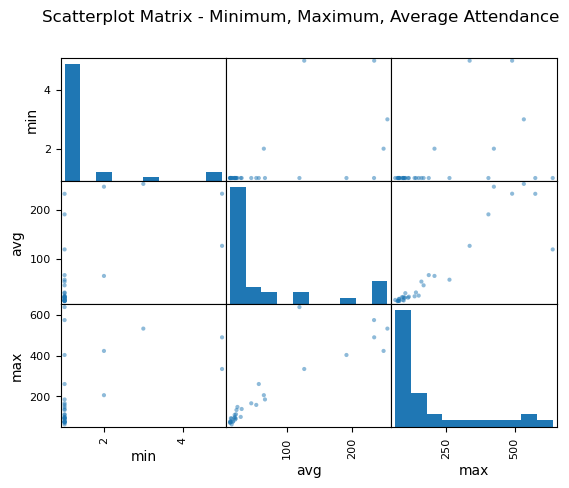

{'Wrightiraptor Mountain': {'min': 1, 'avg': 52.75, 'max': 158}, 'Galactosaurus Rage': {'min': 1, 'avg': 56.63715277777778, 'max': 261}, 'Auvilotops Express': {'min': 1, 'avg': 118.97916666666667, 'max': 640}, 'TerrorSaur': {'min': 2, 'avg': 248.09375, 'max': 424}, 'Wendisaurus Chase': {'min': 5, 'avg': 233.6875, 'max': 491}, 'Keimosaurus Big Spin': {'min': 2, 'avg': 64.39756944444444, 'max': 206}, 'Firefall': {'min': 1, 'avg': 233.46875, 'max': 576}, 'Atmosfear': {'min': 5, 'avg': 126.359375, 'max': 335}, 'North Line': {'min': 1, 'avg': 45.06944444444444, 'max': 166}, 'Jeredactyl Jump': {'min': 1, 'avg': 21.66840277777778, 'max': 112}, 'Sauroma Bumpers': {'min': 1, 'avg': 23.866319444444443, 'max': 148}, 'Flying TyrAndrienkos': {'min': 1, 'avg': 19.76215277777778, 'max': 98}, 'Cyndisaurus Asteroid': {'min': 1, 'avg': 12.947916666666666, 'max': 72}, 'Beelzebufo': {'min': 1, 'avg': 13.869791666666666, 'max': 93}, 'Enchanted Toadstools': {'min': 1, 'avg': 12.864583333333334, 'max': 77}, 

In [26]:
pd.plotting.scatter_matrix(myData, alpha=0.5)
plt.suptitle("Scatterplot Matrix - Minimum, Maximum, Average Attendance")
plt.show()
print(myDict2)